<a href="https://colab.research.google.com/github/Psyrus7/AtharvaShinde_INBT04755_September2023/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn pandas numpy

In [2]:
#Importing Libraries and other stuff here...

In [3]:
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
#loading the Iris datset below...

In [5]:
iris = load_iris()

In [6]:
# Spliting the dataset into features (X) and target labels (y)

In [7]:

X = iris.data

y = iris.target

In [8]:
# there is no need for pre-processing becausse the dataset is already preprocessed

In [9]:
# Step 2 - Training Supervised Models
# Spliting the dataset into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=34)


In [11]:
# Importing the supervised machine learning models as given

In [12]:

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score

In [13]:
# Initialize the models

In [14]:

svm_model = SVC()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()


In [15]:
# Train the models

In [16]:
svm_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Evaluate Classification Models

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [19]:
# Define a function for evaluation

In [20]:
def evaluate_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

In [21]:
# Evaluating SVM model
print("Support Vector Machine:")
evaluate_classifier(svm_model, X_test, y_test)

Support Vector Machine:
Confusion Matrix:
 [[27  0  0]
 [ 0 28  3]
 [ 0  0 17]]
Accuracy: 0.96
Precision: 0.97
Recall: 0.96


In [22]:
# Evaluating Decision Tree model
print("\nDecision Tree:")
evaluate_classifier(dt_model, X_test, y_test)



Decision Tree:
Confusion Matrix:
 [[27  0  0]
 [ 0 30  1]
 [ 0  2 15]]
Accuracy: 0.96
Precision: 0.96
Recall: 0.96


In [23]:
# Evaluating Random Forest model
print("\nRandom Forest:")
evaluate_classifier(rf_model, X_test, y_test)


Random Forest:
Confusion Matrix:
 [[27  0  0]
 [ 0 30  1]
 [ 0  1 16]]
Accuracy: 0.97
Precision: 0.97
Recall: 0.97


In [24]:
from sklearn.metrics import accuracy_score

In [25]:
# Evaluating the model on the basis of training set
y_train_pred_svm = svm_model.predict(X_train)



In [26]:
# Evaluating the models on the basis of testing set
y_test_pred_svm = svm_model.predict(X_test)


In [27]:


# Define the Decision Tree and Random Forest models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Number of folds for cross-validation
num_folds = 20

# Perform k-fold cross-validation for Decision Tree
dt_scores = cross_val_score(dt_model, X, y, cv=num_folds, scoring='accuracy')

# Perform k-fold cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=num_folds, scoring='accuracy')



In [28]:
# Calculating accuracy for training and testing sets
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

In [29]:

print("Training Accuracy (SVM):", train_accuracy_svm)
print("Testing Accuracy (SVM):", test_accuracy_svm)
# Calculate and print mean accuracy scores for Decision Tree and Random Forest
print(f"Testing Decision Tree - Mean Accuracy: {np.mean(dt_scores):.2f}")
print(f"Testing Random Forest - Mean Accuracy: {np.mean(rf_scores):.2f}")



Training Accuracy (SVM): 0.9466666666666667
Testing Accuracy (SVM): 0.96
Testing Decision Tree - Mean Accuracy: 0.95
Testing Random Forest - Mean Accuracy: 0.95


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [31]:
# Initializing the K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=40)  # Assuming 3 clusters (3 species of Iris)

In [32]:
# Fiting the model to the features (X)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

In [33]:
# Get the cluster labels assigned by the K-means algorithm
cluster_labels = kmeans.labels_


In [34]:
# Adding the cluster labels to the original DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Cluster'] = cluster_labels

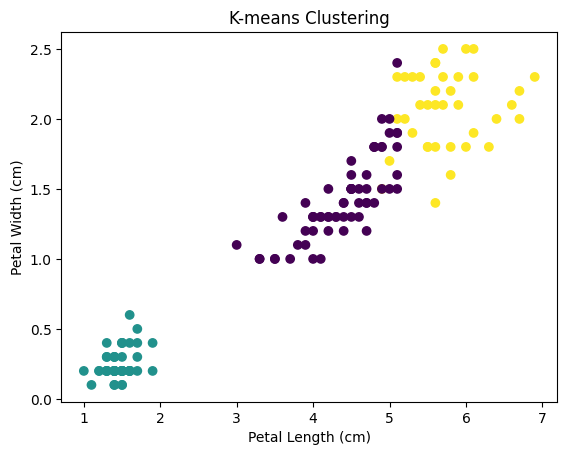

In [35]:
# Visualizing the clustering results
plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'], c=cluster_labels, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('K-means Clustering')
plt.show()